# World Happiness Report

### Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

We need to predict the happiness score considering all the other factors mentioned in the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/happiness_score_dataset.csv")
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

#### As we have to predict "Happiness Score" hence we move the column at the end for ease of understanding.

In [3]:
df = pd.DataFrame(df[['Country', 'Region', 'Happiness Rank',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Happiness Score']])

In [4]:
df.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


In [5]:
df.tail()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
153,Rwanda,Sub-Saharan Africa,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,Benin,Sub-Saharan Africa,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,Syria,Middle East and Northern Africa,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,Burundi,Sub-Saharan Africa,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905
157,Togo,Sub-Saharan Africa,158,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2.839


In [6]:
df.sample(5)

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
85,Romania,Central and Eastern Europe,86,0.06607,1.04345,0.88588,0.76890,0.35068,0.00649,0.13748,1.93129,5.124
22,Venezuela,Latin America and Caribbean,23,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131,6.810
21,Oman,Middle East and Northern Africa,22,0.05335,1.36011,1.08182,0.76276,0.63274,0.32524,0.21542,2.47489,6.853
99,Mongolia,Eastern Asia,100,0.03313,0.82819,1.30060,0.60268,0.43626,0.02666,0.33230,1.34759,4.874
42,Guatemala,Latin America and Caribbean,43,0.05224,0.74553,1.04356,0.64425,0.57733,0.09472,0.27489,2.74255,6.123


In [7]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Happiness Score'],
      dtype='object')

#### About the columns

1. Country: Country basically are the country names according to the survey of happiness score.
    
2. Region: Region are the regions of the continent where survey happens.

3. Happiness Rank: Happiness Rank are the range where country resides according to there happiness score.

4. Standard Error: Standard Error basically are the error value which we found in calculation of the happiness score.

5. Economy (GDP per Capita): measures a country's economic output per person and is calculated by dividing the GDP of a country by its population.
    
6. Family: A group of one or more parents and their children living together as a unit.

7. Health (Life Expectancy): is the expected number of remaining years of life spent in good health from a particular age, typically birth or age sixty-five, assuming current rates of mortality and morbidity.

8. Freedom: Freedom is understood as either having the ability to act or change without constraint or to possess the power and resources to fulfill one's purposes.

9. Trust (Government Corruption): Governement corruption is the use of powers by government officials or their network contacts for illegitimate private gain.

10. Generosity: Basically generosity is the quality of being kind and generous.

11. Dystopia Residual: The score of a hypothetical country that has a lower rank than the lowest ranking country on the report, plus the residual value of each country

12. Happiness Score: Happiness Score basically is the happiness score of the country which can be calculated by above parameters

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  Happiness Score                158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score                  0
dtype: int64

From above code we conclude that there is no null values in the dataset

## Exploratory Data Analysis

In [10]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Happiness Score'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

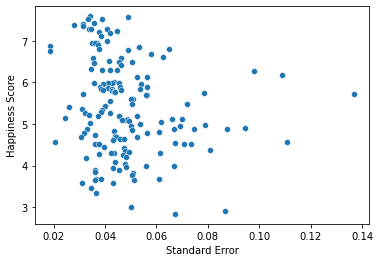

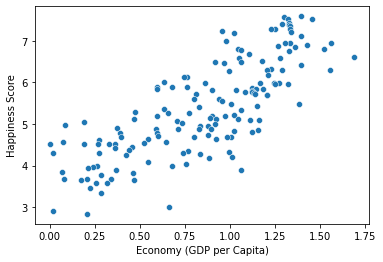

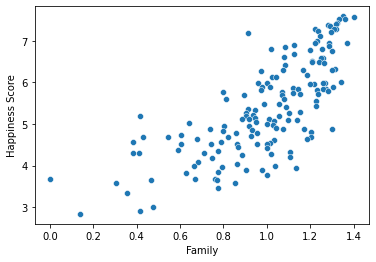

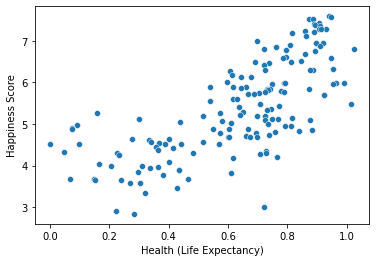

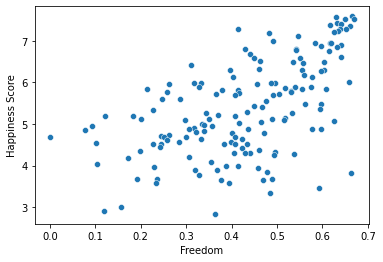

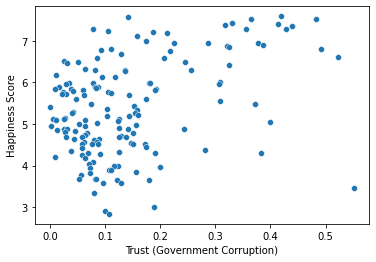

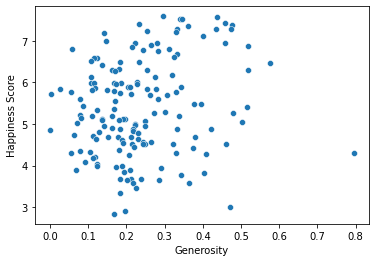

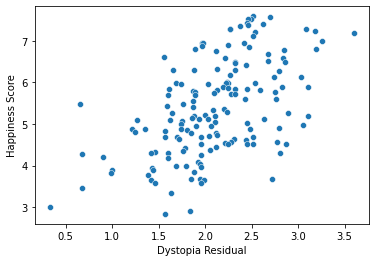

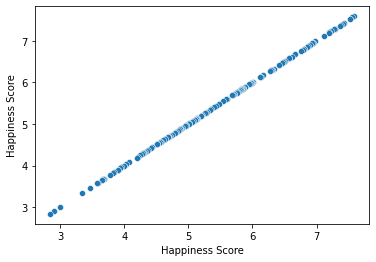

In [12]:
collist = ['Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Happiness Score']
for i in collist:
    sns.scatterplot(df[i], df['Happiness Score'], data = df)
    plt.show()

#### From above scatter plot we conclude that Standard Error and Trust (Government Corruption) having so much outliers.

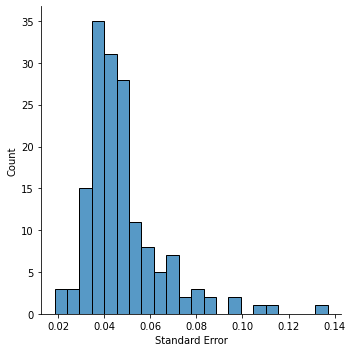

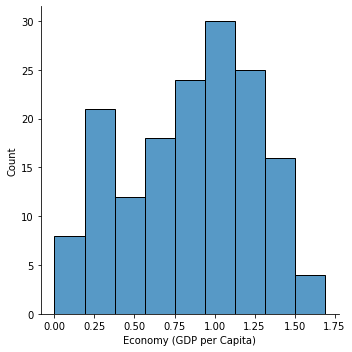

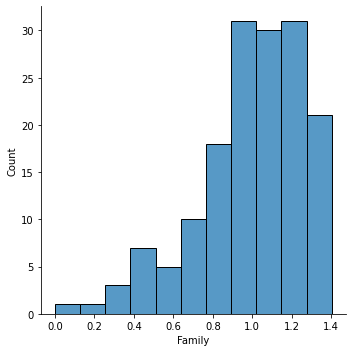

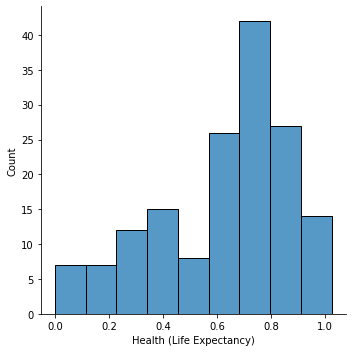

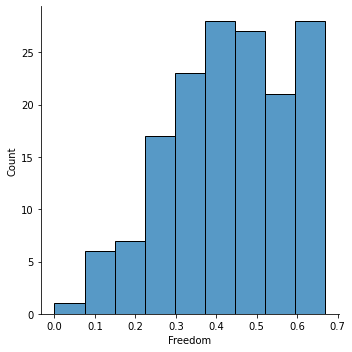

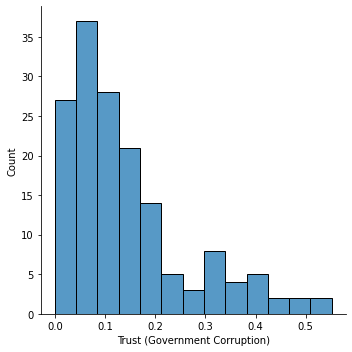

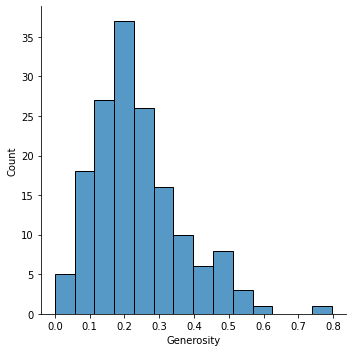

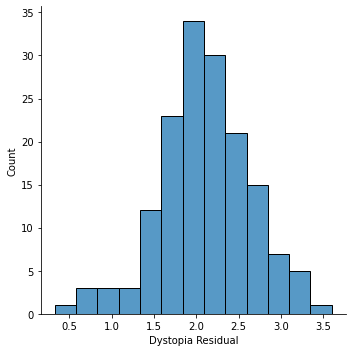

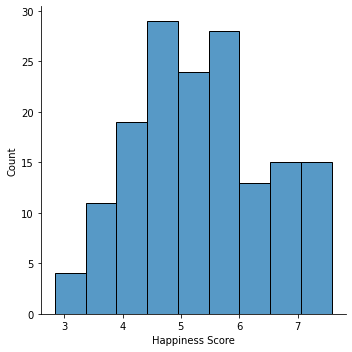

In [13]:
collist = ['Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Happiness Score']
for i in collist:
    sns.displot(df[i],hue_order="Happiness Score", )
    plt.show()

From above graph we conclude that Stardard Error are right skewed with having outlier at measure 0.13

Economy shows some left skewness 

Family, Freedom and Health features are totally right skewed.

Trust (Government Corruption) shows data left skewed

Generosity having little bit normal distribution between 0 to 0.6 but having a outlier present in 0.79.

Dystopia Residual having some left skewed data.

Happiness score shows normal distribution 

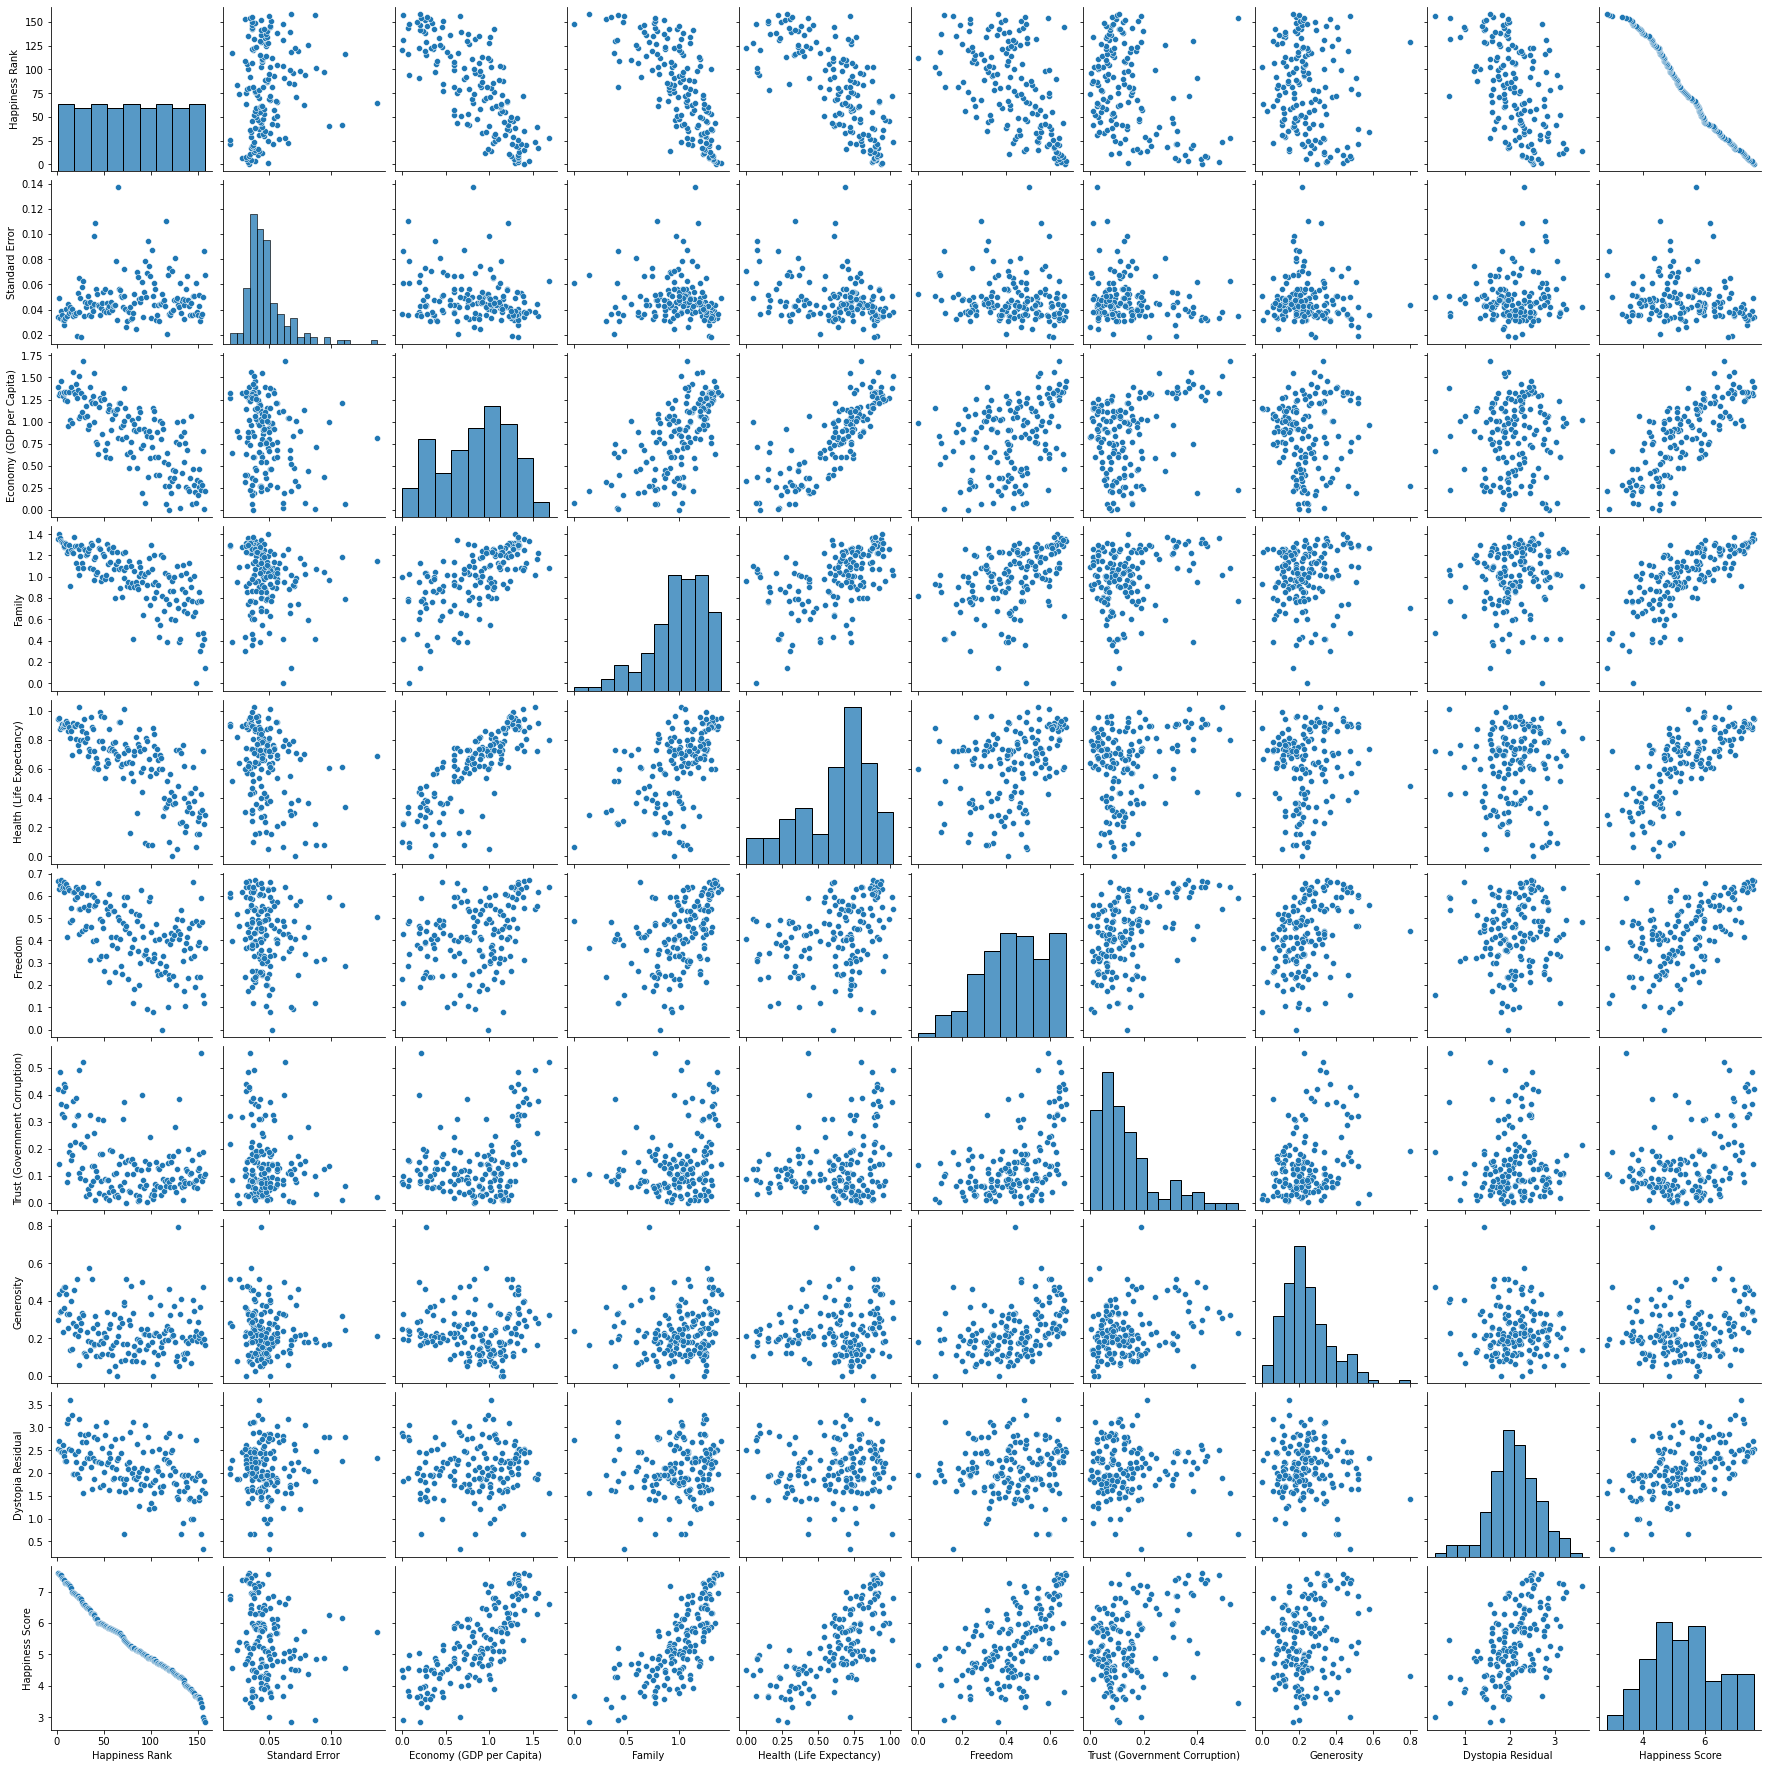

In [14]:
sns.pairplot(df)

#### Pairplot gives us an idea which model suite best for the prediction by seeing all the features simultaneously

### Correlation

In [15]:
df.corr()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
Happiness Rank,1.000000,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999,-0.992105
Standard Error,0.158516,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,-0.177254
Economy (GDP per Capita),-0.785267,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,0.780966
Family,-0.733644,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,0.740605
Health (Life Expectancy),-0.735613,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,0.724200
Freedom,-0.556886,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,0.568211
Trust (Government Corruption),-0.372315,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,0.395199
Generosity,-0.160142,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301,0.180319
Dystopia Residual,-0.521999,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,0.530474
Happiness Score,-0.992105,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,1.000000


#### Correlation using heatmap

<AxesSubplot:>

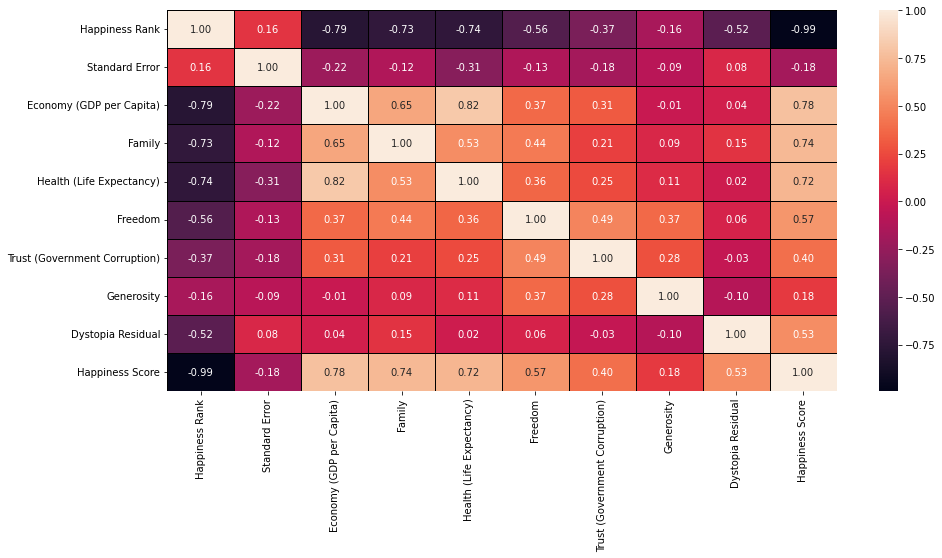

In [16]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, linecolor='black', linewidths=0.5, fmt='.2f')

#### From above correlation graph we found that Standard error show negative correlation with most of the features





In [17]:
df.describe()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,45.754363,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,1.000000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,40.250000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,79.500000,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,118.750000,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,158.000000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


<AxesSubplot:>

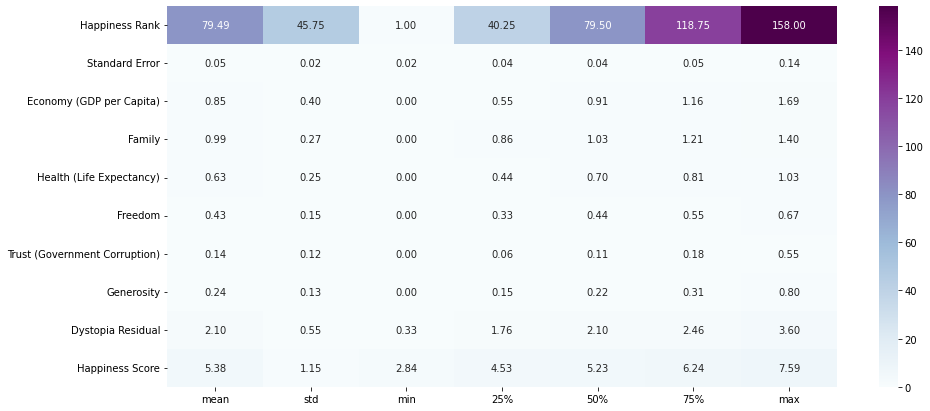

In [18]:
plt.figure(figsize = (15,7))
sns.heatmap(df.describe()[1:].transpose(), annot = True ,cmap='BuPu', fmt='.2f')

Describe method shows features best values but as per figure Happiness Rank shows differ which is basically the index values from bottom to top from the country list.

### Outlier checking

<Figure size 2160x6480 with 0 Axes>

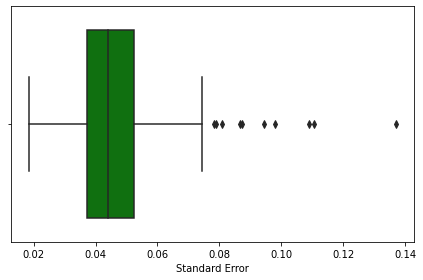

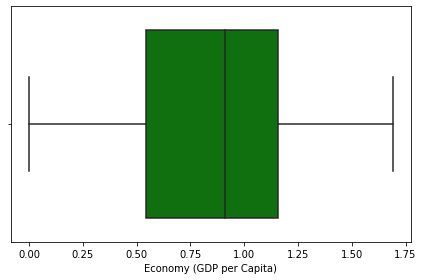

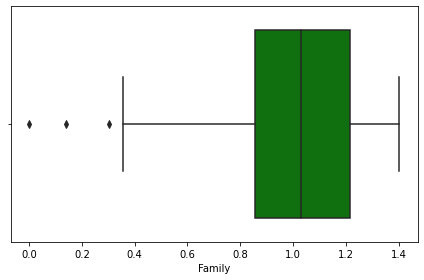

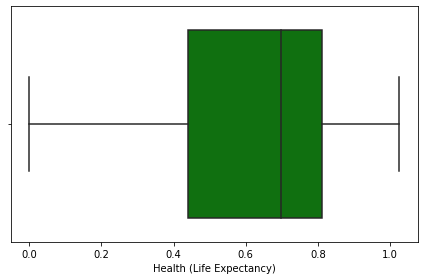

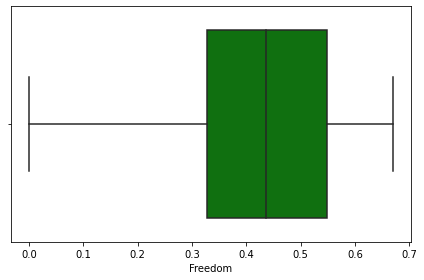

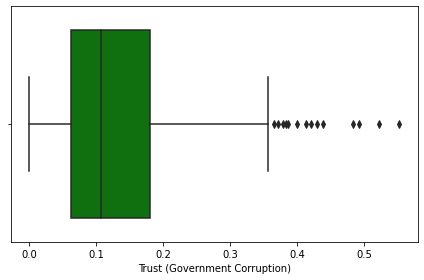

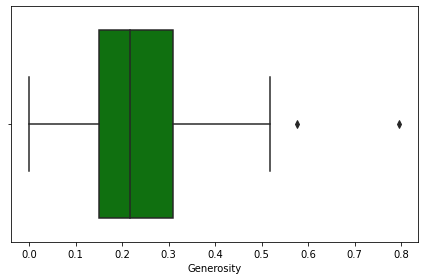

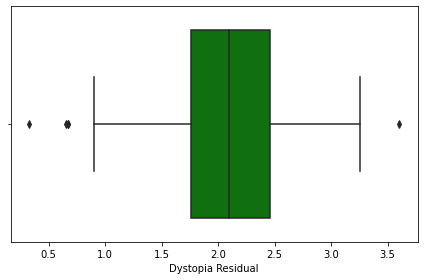

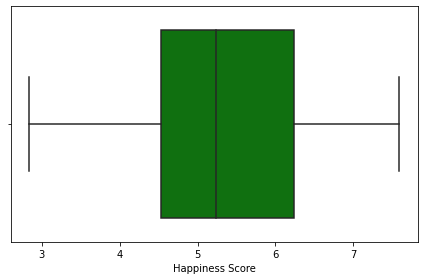

In [19]:
ncol = 30
nrow = 14
plt.figure(figsize = (ncol, 3*ncol))
for i in range(len(collist)):
    #plt.subplot(nrow,ncol, i+1)
    plt.show()
    sns.boxplot(df[collist[i]], color='green',orient="v")
    plt.tight_layout()

#### From above boxplot we found out that Standard Error and Trust (Government Corruption) having so much outliers in the dataset

### Checking Skewness of the features

In [20]:
df.skew()

Happiness Rank                   0.000418
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Happiness Score                  0.097769
dtype: float64

In [21]:
pd.DataFrame([[-0.18, 'Standard Error', 'No','Alot'],[0.40, 'Trust (Government Corruption)','No', 'Alot']], columns = ['Correlation with Target', 'Columns', 'Normal Distribution', 'Outliers'])

,Correlation with Target,Columns,Normal Distribution,Outliers
0,-0.18,Standard Error,No,Alot
1,0.40,Trust (Government Corruption),No,Alot


#### Above features does not having Normal Distribution and having so much outliers hence same are removed

In [22]:
df1 = df.drop(['Standard Error', 'Trust (Government Corruption)'], axis = 1)

#### 
From Dataset we having 3 features which are not independent variable to the dataset also not impacting the dataset.

Hence we are removing the same for better model prediction

In [23]:
df1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Dystopia Residual', 'Happiness Score'],
      dtype='object')

In [24]:
df1 = df1.drop(['Country', 'Region', 'Happiness Rank'], axis = 1)

In [25]:
df1.skew()

Economy (GDP per Capita)   -0.317575
Family                     -1.006893
Health (Life Expectancy)   -0.705328
Freedom                    -0.413462
Generosity                  1.001961
Dystopia Residual          -0.238911
Happiness Score             0.097769
dtype: float64

## Removing outliers

In [26]:
from scipy.stats import zscore
import numpy as np

In [27]:
z = np.abs(zscore(df1))
z.shape

(158, 7)

In [28]:
print(np.where(z>3))

(array([128, 147, 155, 157], dtype=int64), array([4, 1, 5, 1], dtype=int64))


In [29]:
df_new = df1[(z<3).all(axis=1)]
df_new

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual,Happiness Score
0,1.39651,1.34951,0.94143,0.66557,0.29678,2.51738,7.587
1,1.30232,1.40223,0.94784,0.62877,0.43630,2.70201,7.561
2,1.32548,1.36058,0.87464,0.64938,0.34139,2.49204,7.527
3,1.45900,1.33095,0.88521,0.66973,0.34699,2.46531,7.522
4,1.32629,1.32261,0.90563,0.63297,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...
151,0.25812,0.85188,0.27125,0.39493,0.21747,1.46494,3.587
152,0.31982,0.30285,0.30335,0.23414,0.36510,1.95210,3.575
153,0.22208,0.77370,0.42864,0.59201,0.22628,0.67042,3.465
154,0.28665,0.35386,0.31910,0.48450,0.18260,1.63328,3.340


## Percentage of data loss:

In [30]:
# print(df1.shape)  (158, 7)
# print(df_new.shape)  (154, 7)

print("Percentage of data loss:-", round((158-154)/158*100), "Percent")

Percentage of data loss:- 3 Percent


## Dividing data in features and vectors

In [31]:
x = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]


### Removing Skewness from the Features

In [32]:
from sklearn.preprocessing import power_transform
x = power_transform(x, method='yeo-johnson')

## Making standardization of the dataset

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x)

#### Since outcome having continuos values we will use regression modeling to train the model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lr = LinearRegression()
sg = SGDRegressor()
ls = Lasso()
rf = RandomForestRegressor()

In [45]:
def model(model):
    print('Model Name', model)
    for i in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.20)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        if round(r2_score(y_train, pred_train)*100,1) == round(r2_score(y_test, pred_test)*100,1):
            print("\n")
            print("At random state", i, "The model performs very well" )
            print("At random_state:-", i)
            print("Training r2_score is:-", r2_score(y_train, pred_train)*100)
            print("Testing r2_score is:-", r2_score(y_test, pred_test)*100)

In [36]:
model(lr)

Model Name LinearRegression()


At random state 6 The model performs very well
At random_state:- 6
Training r2_score is:- 99.06040282189285
Testing r2_score is:- 99.13088316174932


At random state 12 The model performs very well
At random_state:- 12
Training r2_score is:- 99.06178676851648
Testing r2_score is:- 99.07917250852033


At random state 20 The model performs very well
At random_state:- 20
Training r2_score is:- 99.05931361909943
Testing r2_score is:- 99.13608094826006


At random state 31 The model performs very well
At random_state:- 31
Training r2_score is:- 99.05830212260759
Testing r2_score is:- 99.11523018754161


At random state 37 The model performs very well
At random_state:- 37
Training r2_score is:- 99.05063467923031
Testing r2_score is:- 99.10229024096732


At random state 44 The model performs very well
At random_state:- 44
Training r2_score is:- 99.0607944115018
Testing r2_score is:- 99.1160763684383


At random state 47 The model performs very well
At random_st

In [46]:
lr = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 6, test_size = 0.20)
lr.fit(x_train, y_train)
pred_test_final = lr.predict(x_test)
print("Testing r2_score is:-", r2_score(y_test, pred_test_final)*100)

Testing r2_score is:- 99.13088316174932


### Cross validation of the model

In [47]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr, x, y, cv = j)
    cv_mean = cv_score.mean()
    print('At cv:-', j )
    print('best cv score', cv_mean*100)

At cv:- 2
best cv score 94.40265854148026
At cv:- 3
best cv score 91.18142792038965
At cv:- 4
best cv score 82.18191656439636
At cv:- 5
best cv score 76.70056024273467
At cv:- 6
best cv score 60.72621835314177
At cv:- 7
best cv score 42.90931271792299
At cv:- 8
best cv score 31.575036670199925
At cv:- 9
best cv score 17.906160205830435


#### CV selected = 2

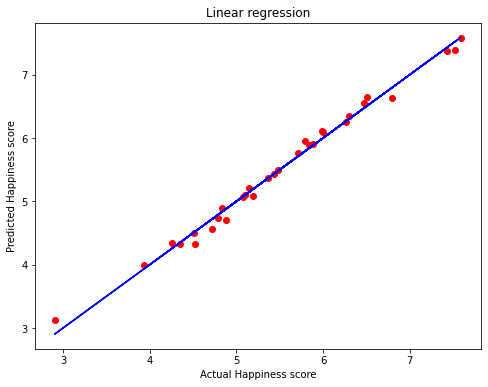

In [49]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_test_final, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel("Actual Happiness score")
plt.ylabel('Predicted Happiness score')
plt.title('Linear regression')
plt.show()

# Regularization

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
parameters = {"alpha" : [0.0001, 0.001, 0.01, .1, 1, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [74]:
ls =Lasso(alpha = 0.0001, random_state=0)
ls.fit(x_train, y_train)
pred_testls = ls.predict(x_test)
print("r2_score is:-", r2_score(y_test, pred_testls)*100)
print("\n")

print("CV score of the model", "\n")

cv_score = cross_val_score(ls, x, y, cv = 2)
cv_mean = cv_score.mean()
print('cv score', cv_mean*100)

r2_score is:- 99.13011131581908


CV score of the model 

cv score 94.38520616684822


## Ensemble Technique

In [59]:
parameters = {"criterion": ['mse', 'mae']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf, parameters)

clf.fit(x_train, y_train)

clf.best_params_

{'criterion': 'mae'}

In [75]:
rf = RandomForestRegressor(criterion = 'mae')

rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_dec = rf.predict(x_test)

rfs = r2_score(y_test, pred_dec)
print("r2 score", rfs*100)

print("CV score of the model", "\n")
cv_score = cross_val_score(ls, x, y, cv = 2)
cv_mean = cv_score.mean()
print('CV score', cv_mean*100)

r2 score 93.37340935576032
CV score of the model 

CV score 94.38520616684822


#### Checking different models and their observation seems perfectly fitted at random_state = 6 with LinearRegression

In [40]:
lr_final = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 6, test_size = 0.20)
lr_final.fit(x_train, y_train)
pred_test_final = lr_final.predict(x_test)
print("Testing r2_score is:-", r2_score(y_test, pred_test_final)*100)

Testing r2_score is:- 99.13088316174932


In [41]:
print('mean_squared_error',mean_squared_error(pred_test_final, y_test))
print('mean_absolute_error',mean_absolute_error(pred_test_final, y_test))
print('r2_score', r2_score(pred_test_final, y_test))

mean_squared_error 0.009666508644553009
mean_absolute_error 0.07643400203243807
r2_score 0.9911314347803616


#### From above code we conclude that model worked well with having less than 0.01 error 

In [42]:
import pickle

filename = "lr_final.pkl"
pickle.dump(lr_final, open(filename, 'wb'))

In [43]:
import numpy as np
actual_value = y_test
predicted_value = lr_final.predict(x_test)

df_final = pd.DataFrame({"Happiness_score": actual_value, "Predicted Happiness score": predicted_value})
df_final

,Happiness_score,Predicted Happiness score
71,5.474,5.491118
4,7.427,7.375735
140,3.931,3.991649
102,4.839,4.890961
2,7.527,7.388011
45,5.987,6.106443
156,2.905,3.126559
88,5.098,5.102896
64,5.709,5.759064
104,4.788,4.734655
